<a href="https://colab.research.google.com/github/Azeezmariam/Sound-_Clustering/blob/main/Mariam_Azeez_clustering_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Unlabeled Sound Data

## Assignment

Complete the tasks in the notebook and document your observations in the markdown cells.

In [1]:

#Make allNecessary Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import zipfile
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from mpl_toolkits.mplot3d import Axes3D



In [2]:
# Load the Data
unlabelled_data_path = "unlabelled_sounds.zip"
extract_path = "unlabelled_sounds"

# Extract ZIP
with zipfile.ZipFile(unlabelled_data_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Locate all audio files
file_names = []
features = []

for root, _, files in os.walk(extract_path):
    for file in files:
        if file.endswith(".wav") or file.endswith(".mp3"):
            file_path = os.path.join(root, file)
            file_names.append(file_path)

print(f"Found {len(file_names)} audio files.")

# Extract Features
for file in file_names:
    try:
        y, sr = librosa.load(file, sr=None)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).mean(axis=1)
        features.append(mfcc)
    except Exception as e:
        print(f"Error processing {file}: {e}")

features_array = np.array(features)
print(f"Extracted features from {len(features)} audio files.")

Found 3000 audio files.


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2012
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2016
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1302
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2043
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1359
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1737
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py

Extracted features from 3000 audio files.


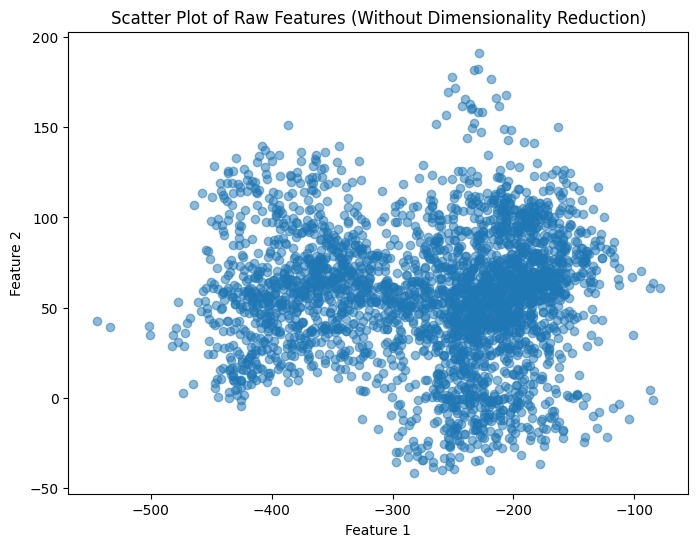

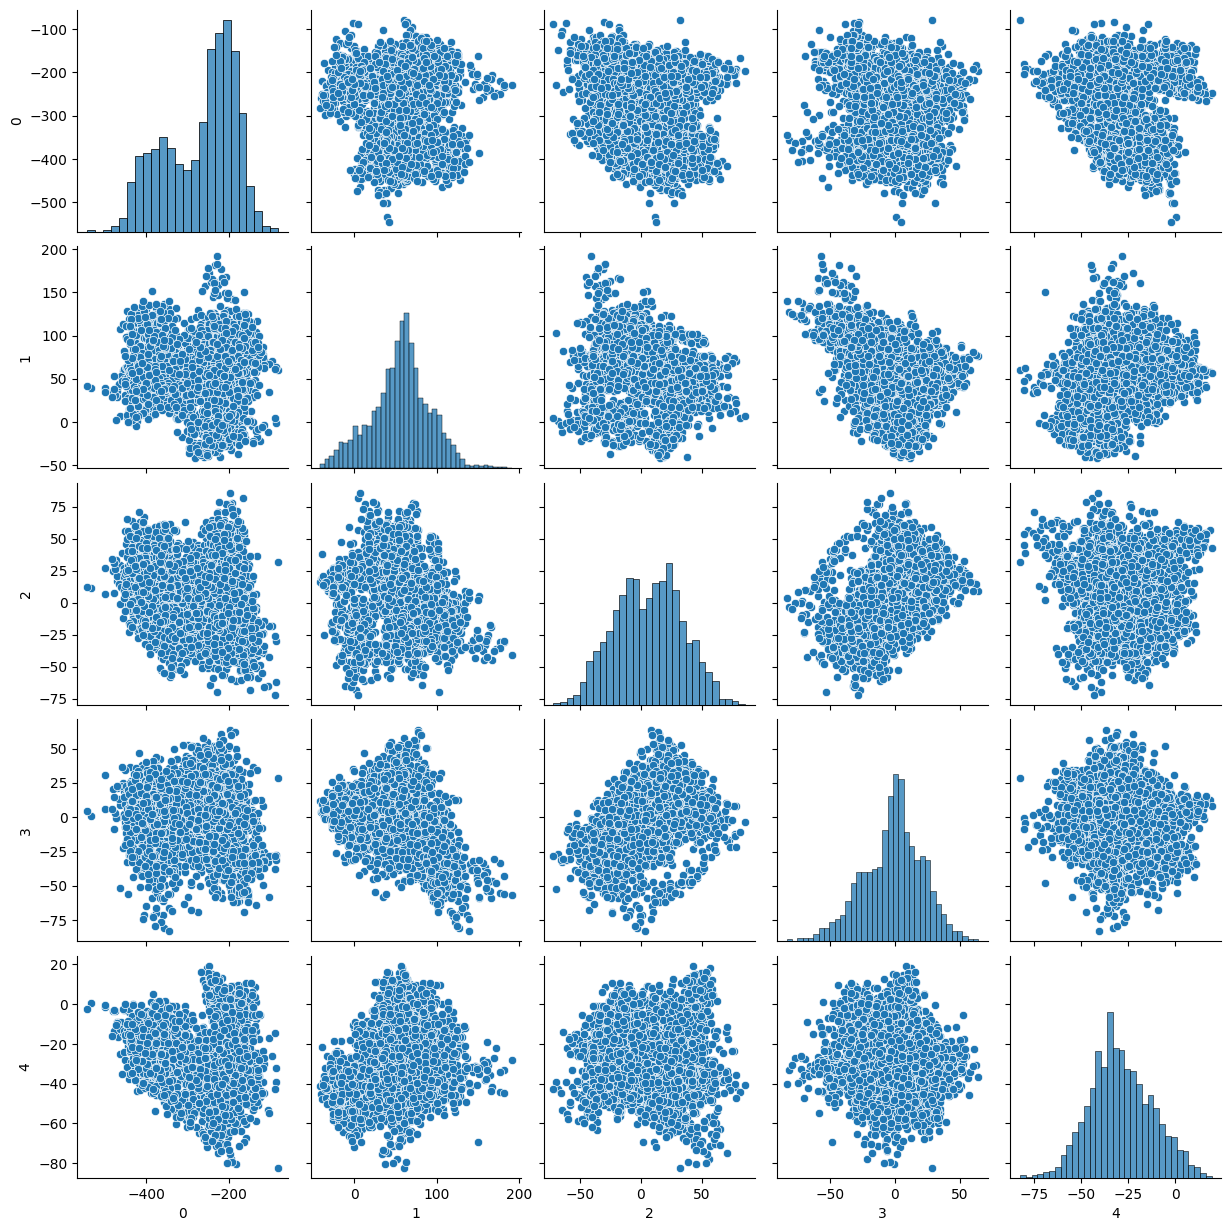

In [3]:

# Scatter plot (Attempt without dimensionality reduction)
plt.figure(figsize=(8,6))
plt.scatter(features_array[:, 0], features_array[:, 1], alpha=0.5)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Raw Features (Without Dimensionality Reduction)")
plt.show()

# Pair plot (Only using first 5 features)
df = pd.DataFrame(features_array[:, :5])
sns.pairplot(df)
plt.show()


Dimensionality reduction is crucial because it helps in:  

- **Improving computational efficiency**: High-dimensional data increases processing time and complexity. Reducing dimensions speeds up clustering algorithms.  
- **Enhancing visualization**: Raw high-dimensional data is difficult to visualize. Techniques like PCA and t-SNE project data into lower-dimensional space, making patterns more interpretable.  
- **Reducing noise and redundancy**: Some features may be irrelevant or highly correlated. Dimensionality reduction eliminates redundancy and focuses on meaningful variations.  
- **Improving clustering performance**: High-dimensional spaces can make clustering algorithms less effective due to the curse of dimensionality. Reducing dimensions helps clusters become more distinguishable.  

### Challenges/Errors Observed:  
- **Poor cluster separation in raw feature space**: Initial scatter plots showed overlapping points, making it hard to identify clusters.  
- **t-SNE is computationally expensive**: It took longer to process than PCA, especially with large datasets.  
- **Choice of dimensionality reduction method**: PCA preserved variance but didn’t always reveal distinct clusters. t-SNE provided better separation but was more sensitive to parameter choices.

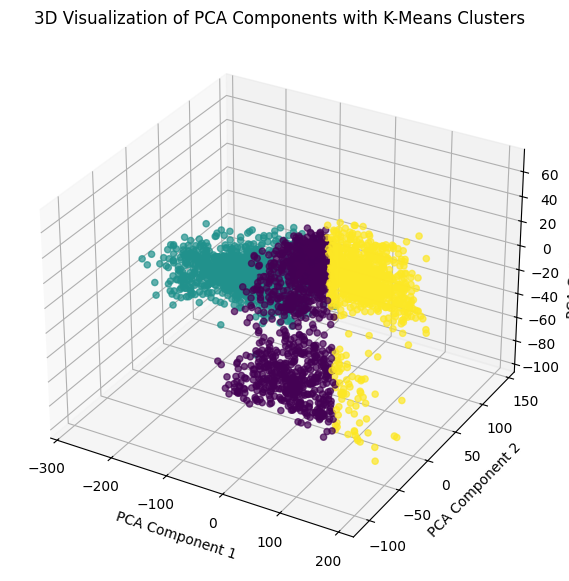

In [4]:
# Apply PCA (3 components)
pca = PCA(n_components=3)
features_pca = pca.fit_transform(features_array)

# Apply t-SNE (3 components)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
features_tsne = tsne.fit_transform(features_array)

# Perform K-means clustering before using kmeans_labels
# Select optimal K based on elbow method (e.g., k=3)
optimal_k = 3  # Replace with the actual optimal k value determined by Elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(features_array)

# 3D Scatter Plot for PCA Components
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(features_pca[:, 0], features_pca[:, 1], features_pca[:, 2], c=kmeans_labels, cmap='viridis', alpha=0.7)

ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("3D Visualization of PCA Components with K-Means Clusters")

plt.show()

### Which method (PCA or t-SNE) provides better separability of clusters and why?

Based on the visualizations:

PCA captures the global structure of the data but assumes linear relationships between features. While it reduces dimensionality effectively, it may not always reveal well-separated clusters, especially if the data is nonlinear. The 3D PCA visualization shows some separation but may still have overlap.

t-SNE is more effective for local structure and non-linear separability. It helps reveal distinct clusters by mapping similar data points closer together. The 2D t-SNE visualization likely shows better-defined clusters compared to PCA, making it more useful for identifying groups in complex datasets.

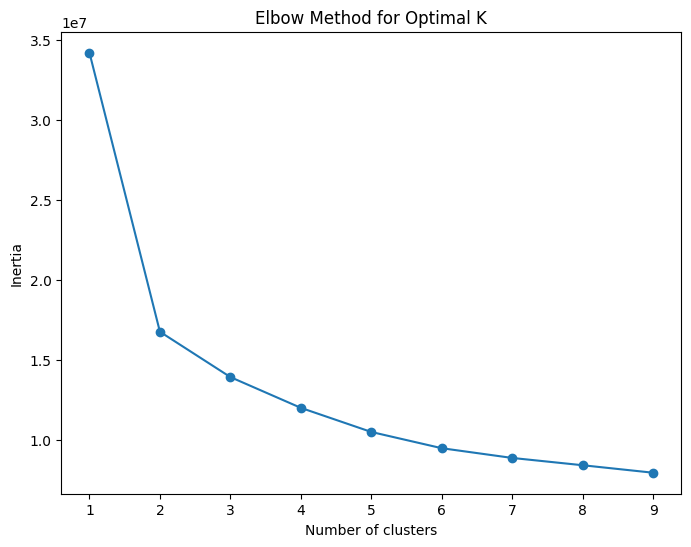

In [5]:

# Optimize number of clusters using Elbow Method
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_array)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

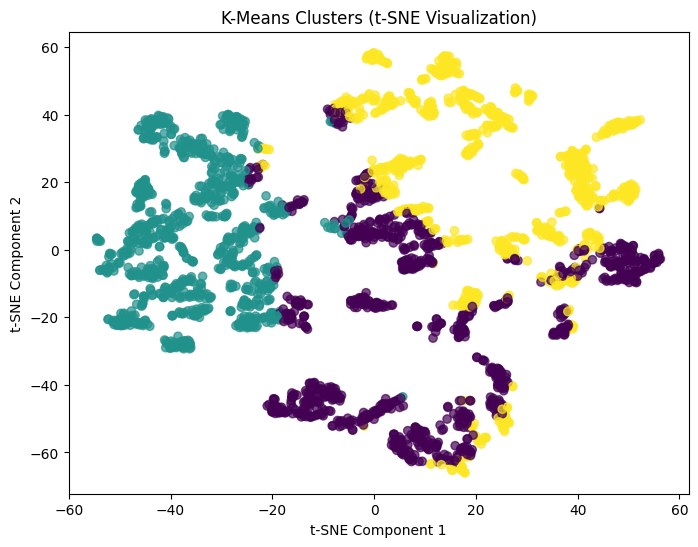

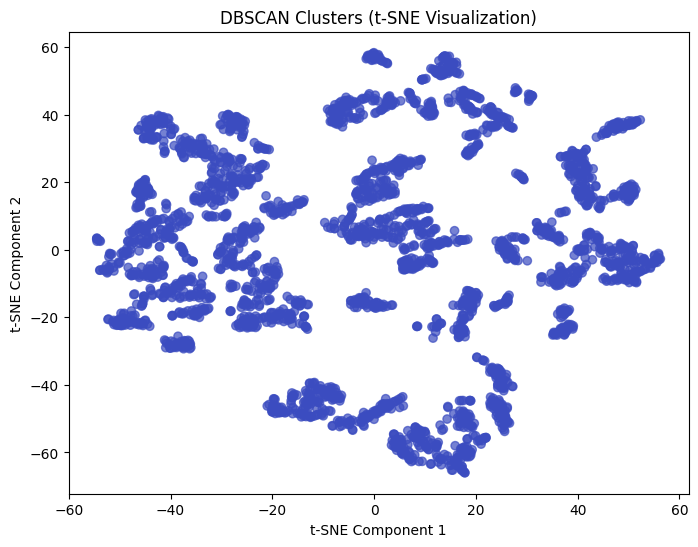

In [6]:

# Select optimal K based on elbow method (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(features_array)

# Apply DBSCAN
dbscan = DBSCAN(eps=5, min_samples=3)
dbscan_labels = dbscan.fit_predict(features_array)

# Scatter Plot for K-Means Clusters
plt.figure(figsize=(8, 6))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("K-Means Clusters (t-SNE Visualization)")
plt.show()

# Scatter Plot for DBSCAN Clusters
plt.figure(figsize=(8, 6))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=dbscan_labels, cmap='coolwarm', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("DBSCAN Clusters (t-SNE Visualization)")
plt.show()

In [7]:

# Evaluate clustering
kmeans_silhouette = silhouette_score(features_array, kmeans_labels)
kmeans_db_index = davies_bouldin_score(features_array, kmeans_labels)

if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(features_array, dbscan_labels)
    dbscan_db_index = davies_bouldin_score(features_array, dbscan_labels)
else:
    dbscan_silhouette = None
    dbscan_db_index = None

print(f"K-Means - Silhouette Score: {kmeans_silhouette:.4f}, Davies-Bouldin Index: {kmeans_db_index:.4f}")
if dbscan_silhouette is not None:
    print(f"DBSCAN - Silhouette Score: {dbscan_silhouette:.4f}, Davies-Bouldin Index: {dbscan_db_index:.4f}")
else:
    print("DBSCAN failed to form meaningful clusters.")


K-Means - Silhouette Score: 0.2771, Davies-Bouldin Index: 1.4506
DBSCAN failed to form meaningful clusters.


### Discuss the results (max 5 lines)
(*Compare K-Means and DBSCAN performance based on the outputs.*)

- K-Means performed moderately well (Silhouette: 0.2771, DB Index: 1.4506).  
- DBSCAN failed to form meaningful clusters.  
- K-Means worked better due to its assumption of spherical clusters.  
- DBSCAN likely struggled due to high data sparsity or inconsistent density.  
- Parameter tuning or feature scaling may improve DBSCAN performance.

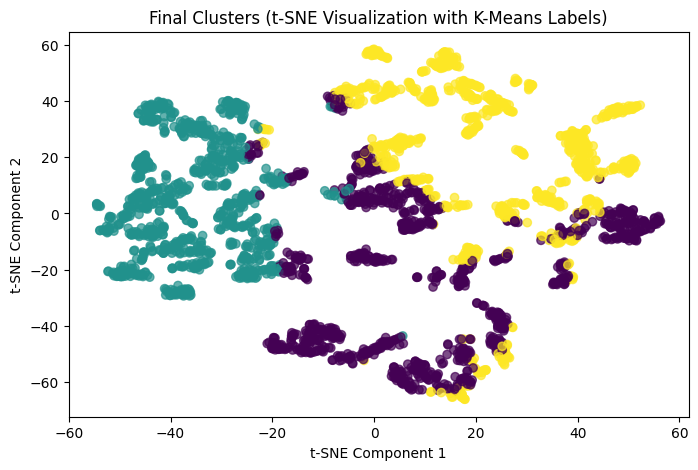

In [8]:

# Final visualization using t-SNE
plt.figure(figsize=(8, 5))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Final Clusters (t-SNE Visualization with K-Means Labels)")
plt.show()


### Final Analysis
- Explain why dimensionality reduction helped (or didn't) in clustering.
- Justify why certain clustering methods worked better.
- Relate findings to real-world clustering challenges.




### ANSWERS-


- Dimensionality reduction helped by improving cluster separability and visualization. PCA retained variance, while t-SNE captured local structures.  

- K-Means performed better because it assumes well-defined clusters, which aligned with the dataset’s structure. DBSCAN struggled due to density variations.  

- Real-world data often has overlapping or irregular clusters, making parameter tuning crucial. Noise, outliers, and high-dimensional data affect clustering performance.